In [1]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(123)
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [6]:
n_class_0,n_class_1

(900, 100)

In [10]:
class_0=pd.DataFrame({
        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
        'target':[0]*n_class_0
})
class_1=pd.DataFrame({
        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
        'target':[1]*n_class_1
})

In [13]:
class_1

,feature_1,feature_2,target
0,0.157749,0.328462,1
1,0.751376,1.038230,1
2,-0.338732,1.147064,1
3,-2.095238,0.638254,1
4,0.154596,-1.075766,1
...,...,...,...
95,-0.229982,-1.122270,1
96,-0.533514,-1.418638,1
97,0.060924,-1.859715,1
98,1.041367,0.913822,1


In [21]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [22]:
df.head()

,feature_1,feature_2,target
0,-0.450599,0.571923,0
1,0.609590,-0.217233,0
2,1.173744,0.054318,0
3,0.871815,0.155998,0
4,1.904723,0.467810,0


In [23]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [24]:
import seaborn as sns

<Axes: xlabel='feature_2', ylabel='Count'>

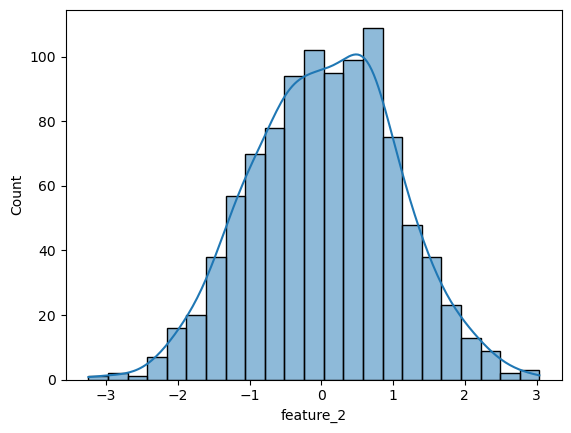

In [28]:
sns.histplot(df['feature_2'],kde=True)

## Upsampling

In [30]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [31]:
df_minority.head()

,feature_1,feature_2,target
900,0.157749,0.328462,1
901,0.751376,1.038230,1
902,-0.338732,1.147064,1
903,-2.095238,0.638254,1
904,0.154596,-1.075766,1


In [32]:
df_majority.head()

,feature_1,feature_2,target
0,-0.450599,0.571923,0
1,0.609590,-0.217233,0
2,1.173744,0.054318,0
3,0.871815,0.155998,0
4,1.904723,0.467810,0


In [33]:
from sklearn.utils import resample

In [36]:
df_minority_upsample=resample(df_minority,
                             replace=True, ##Sample with replacement
                             n_samples=len(df_majority), ##to match with the majority sample
                             random_state=42
                             )

In [38]:
df_minority_upsample.shape

(900, 3)

In [40]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [41]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [43]:
df_upsampled.shape

(1800, 3)

## Downsampling

In [45]:
class_0=pd.DataFrame({
        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
        'target':[0]*n_class_0
})
class_1=pd.DataFrame({
        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_1),
        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_1),
        'target':[1]*n_class_1
})

In [46]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [57]:
df_majority_downsample=resample(df_majority,
                                replace=False,
                               random_state=42,
                               n_samples=len(df_minority))

In [58]:
df_majority_downsample.shape

(100, 3)

In [59]:
df_majority_downsample['target'].value_counts()

target
0    100
Name: count, dtype: int64

In [61]:
pd.concat([df_minority,df_majority_downsample]).reset_index(drop=True)

,feature_1,feature_2,target
0,0.157749,0.328462,1
1,0.751376,1.038230,1
2,-0.338732,1.147064,1
3,-2.095238,0.638254,1
4,0.154596,-1.075766,1
...,...,...,...
195,0.335357,0.822727,0
196,1.898206,-1.204384,0
197,-0.168250,2.394681,0
198,0.047011,0.092973,0
